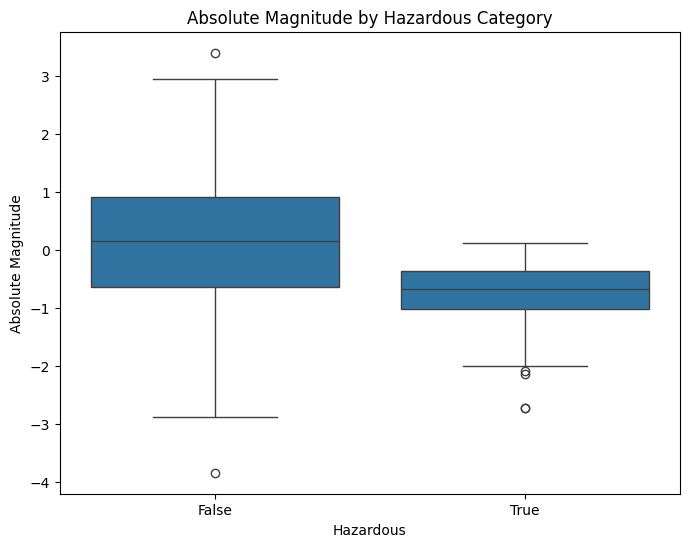

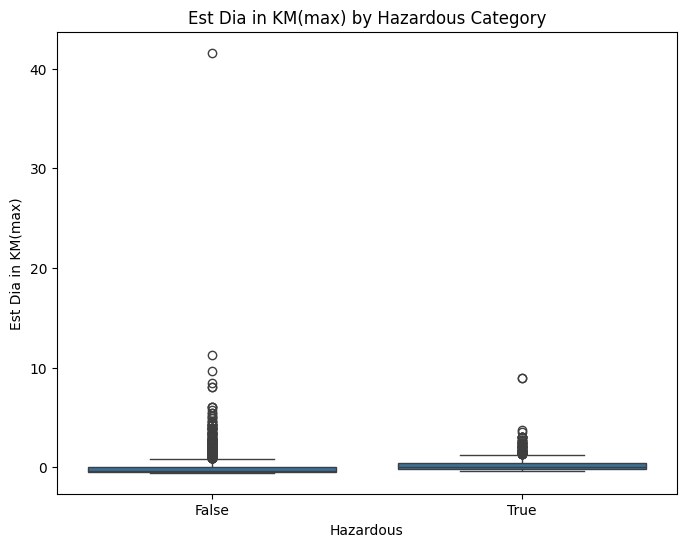

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = 'processed_nasa_data.csv'
data = pd.read_csv(file_path)



def plot_absolute_magnitude_by_hazardous(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Hazardous', y='Absolute Magnitude', data=data)
    plt.title('Absolute Magnitude by Hazardous Category')
    plt.show()


def plot_est_dia_by_hazardous(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Hazardous', y='Est Dia in KM(max)', data=data)
    plt.title('Est Dia in KM(max) by Hazardous Category')
    plt.show()

plot_absolute_magnitude_by_hazardous(data)
plot_est_dia_by_hazardous(data)


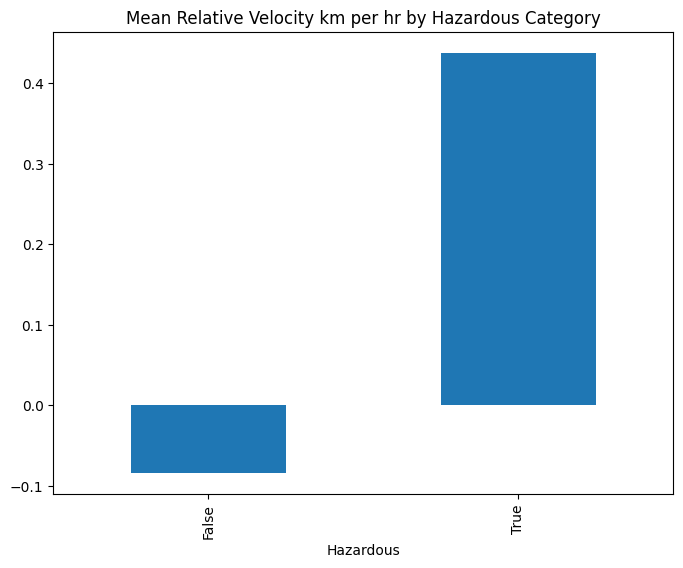

C:\Users\Karan\AppData\Local\Temp\ipykernel_11660\2049280002.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Hazardous']]['Orbital Period'], label='Hazardous', shade=True)
C:\Users\Karan\AppData\Local\Temp\ipykernel_11660\2049280002.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[~data['Hazardous']]['Orbital Period'], label='Non-Hazardous', shade=True)


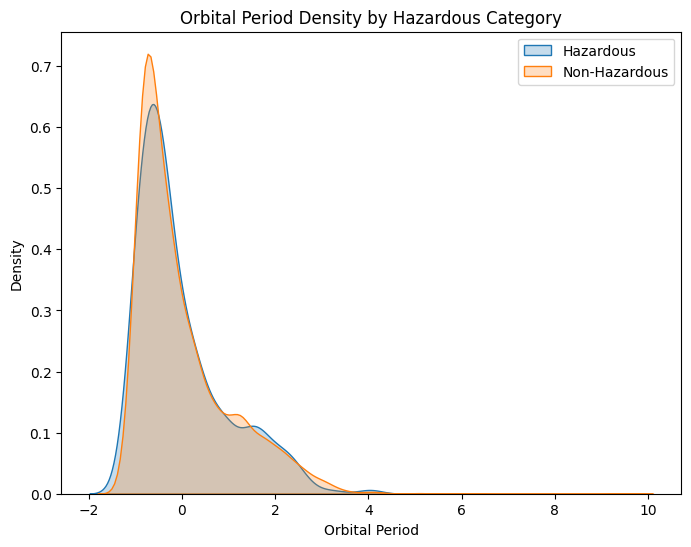

In [7]:
def plot_relative_velocity_by_hazardous(data):
    plt.figure(figsize=(8, 6))
    data.groupby('Hazardous')['Relative Velocity km per hr'].mean().plot(kind='bar')
    plt.title('Mean Relative Velocity km per hr by Hazardous Category')
    plt.show()


def plot_orbital_period_density(data):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[data['Hazardous']]['Orbital Period'], label='Hazardous', shade=True)
    sns.kdeplot(data[~data['Hazardous']]['Orbital Period'], label='Non-Hazardous', shade=True)
    plt.title('Orbital Period Density by Hazardous Category')
    plt.legend()
    plt.show()
plot_relative_velocity_by_hazardous(data)
plot_orbital_period_density(data)

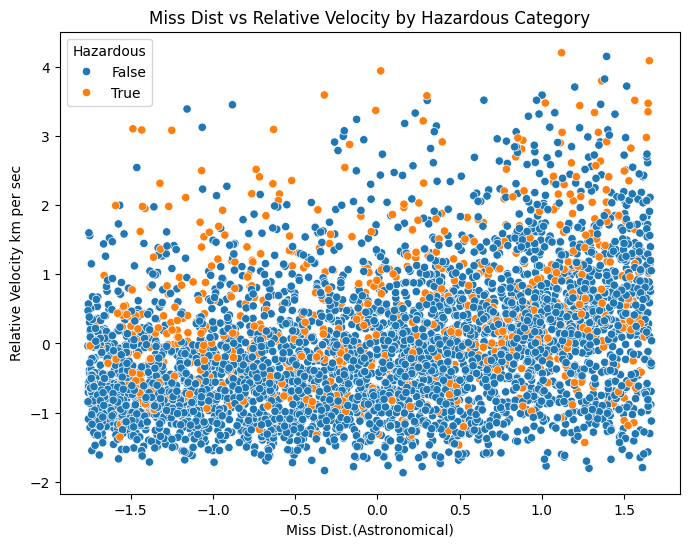

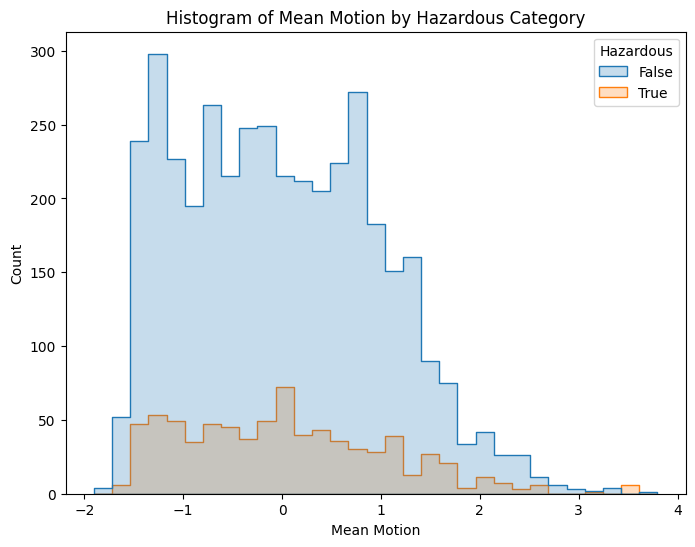

In [8]:
def plot_miss_dist_vs_relative_velocity(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Miss Dist.(Astronomical)', y='Relative Velocity km per sec', hue='Hazardous', data=data)
    plt.title('Miss Dist vs Relative Velocity by Hazardous Category')
    plt.show()

def plot_mean_motion_histogram(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x='Mean Motion', hue='Hazardous', element='step')
    plt.title('Histogram of Mean Motion by Hazardous Category')
    plt.show()

plot_miss_dist_vs_relative_velocity(data)
plot_mean_motion_histogram(data)

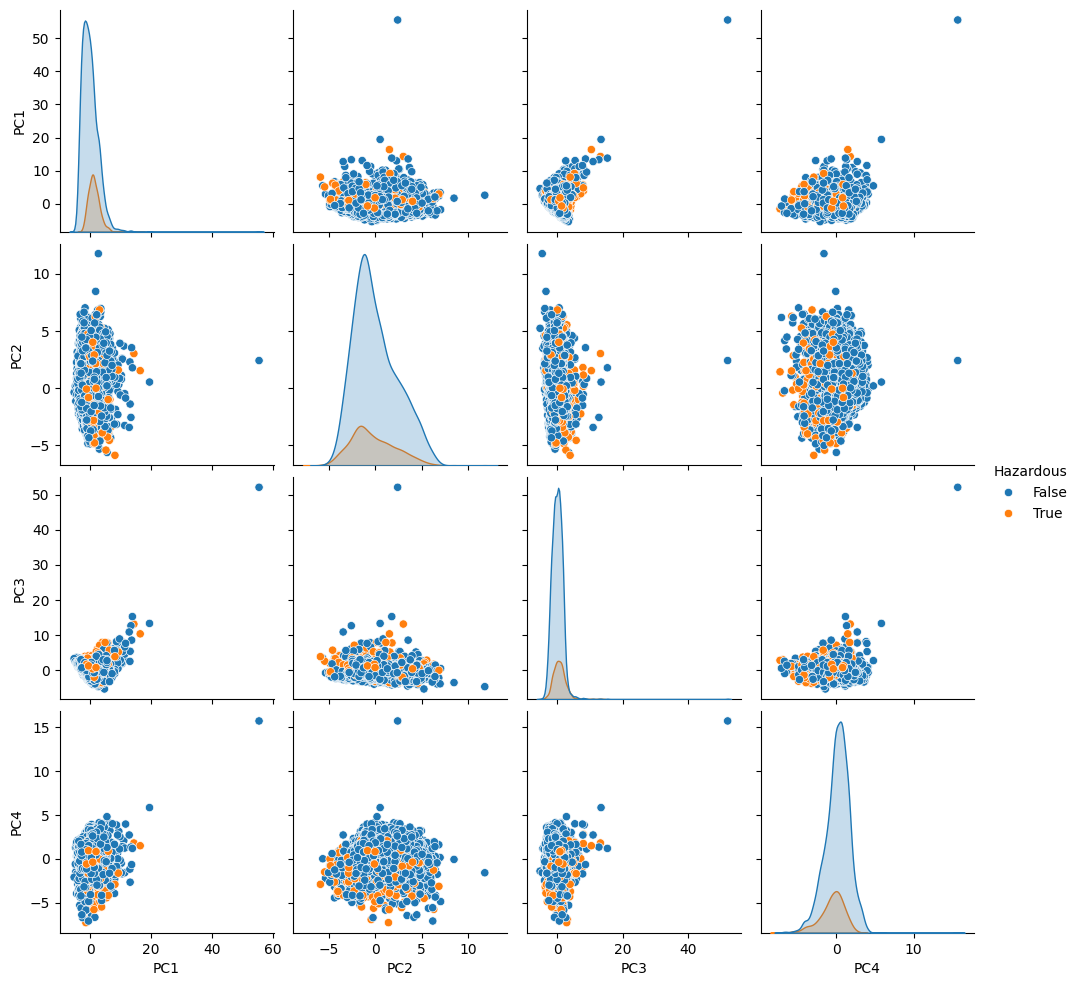

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA()
principal_components = pca.fit_transform(data.drop(columns=['Hazardous']))  # Assuming 'Hazardous' is the target column

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
data_numeric = data.drop(non_numeric_columns, axis=1)
data_hazardous = data['Hazardous']
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Applying PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
pca_df['Hazardous'] = data_hazardous
# Plotting various charts
sns.pairplot(pca_df,hue='Hazardous')
plt.show()

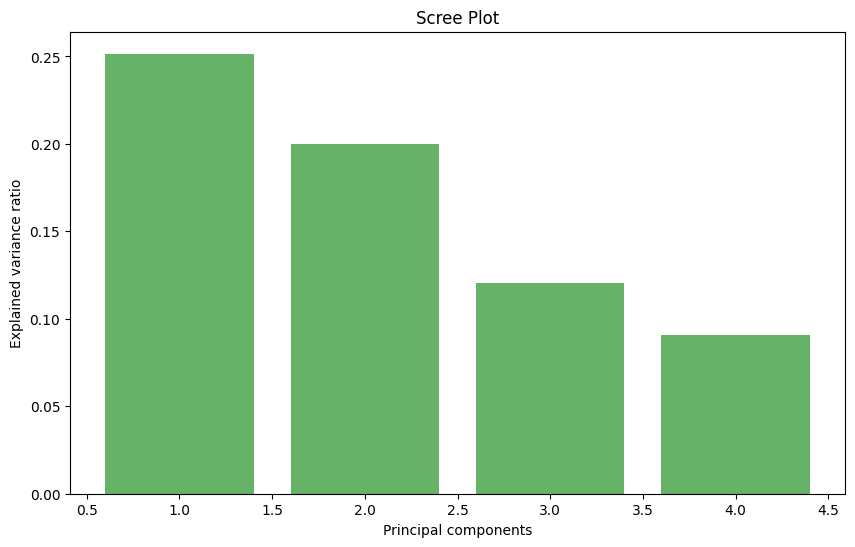

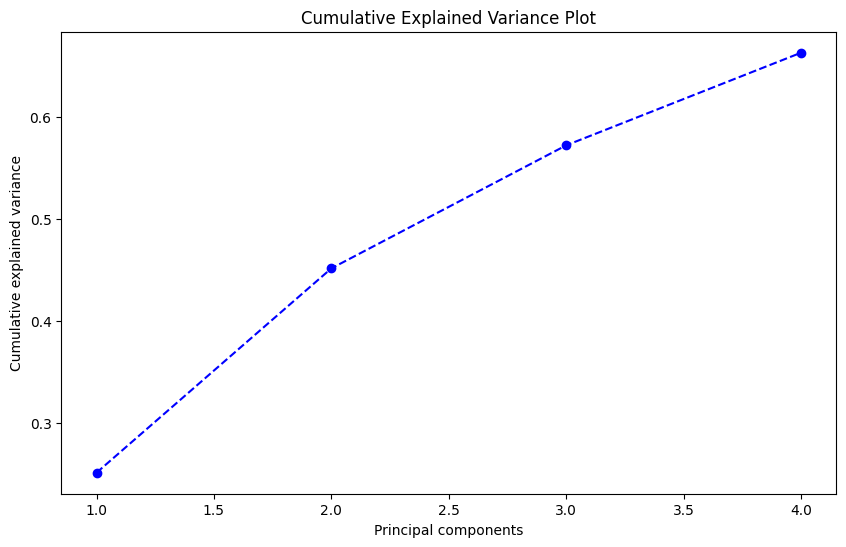

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='g', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance Plot')
plt.show()

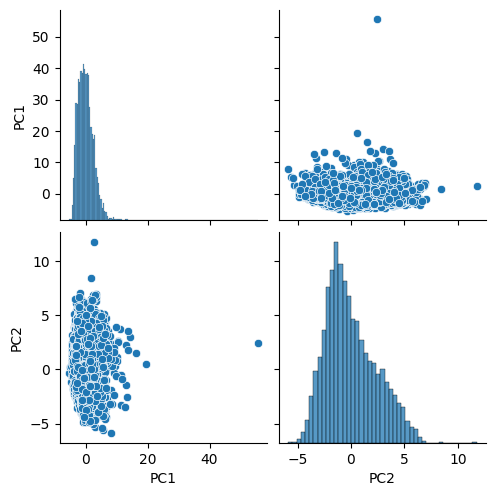

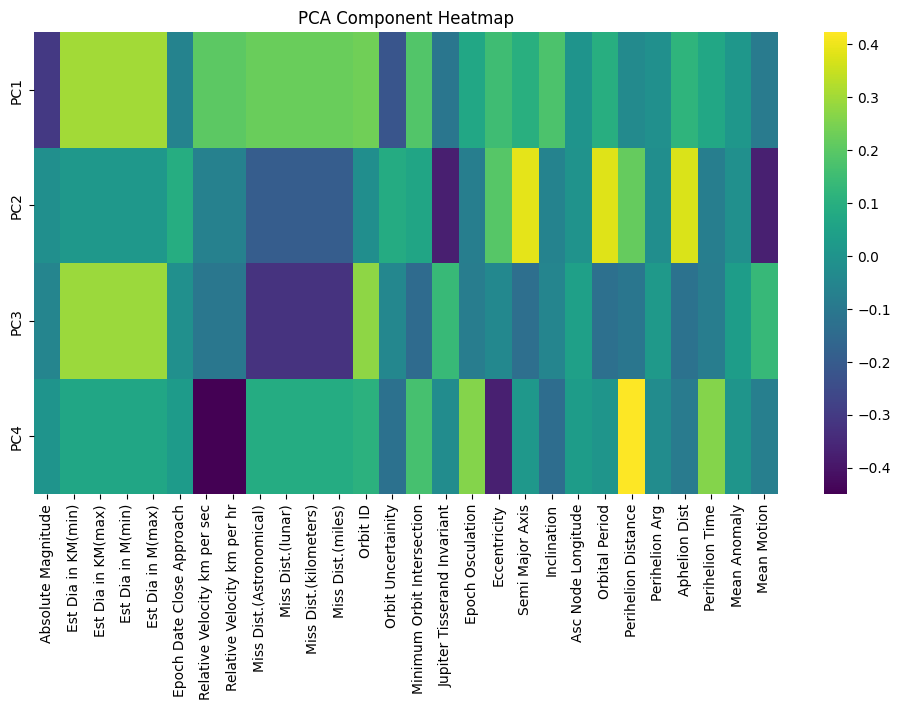

In [4]:
sns.pairplot(pca_df[['PC1', 'PC2']])
plt.show()

# 4. Heatmap of the principal components correlation with features
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_numeric.columns, index=['PC1', 'PC2', 'PC3', 'PC4']), cmap='viridis')
plt.title('PCA Component Heatmap')
plt.show()

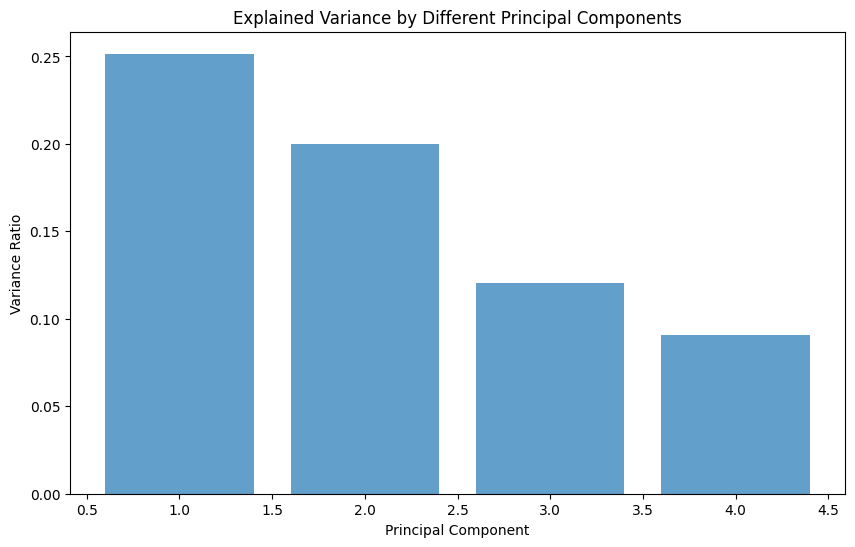

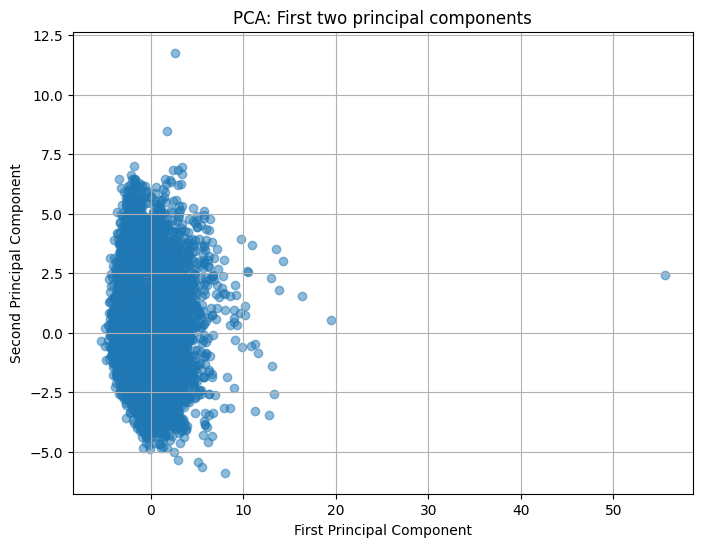

In [5]:
pca_values_table = pd.DataFrame(pca.components_, columns=data_numeric.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])
pca_values_table.head()

# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Different Principal Components')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First two principal components')
plt.grid(True)
plt.show()

R-squared (R2) Score: 0.3149951314508277
Mean Squared Error (MSE): 0.09594882729211088
Root Mean Squared Error (RMSE): 0.30975607708665037


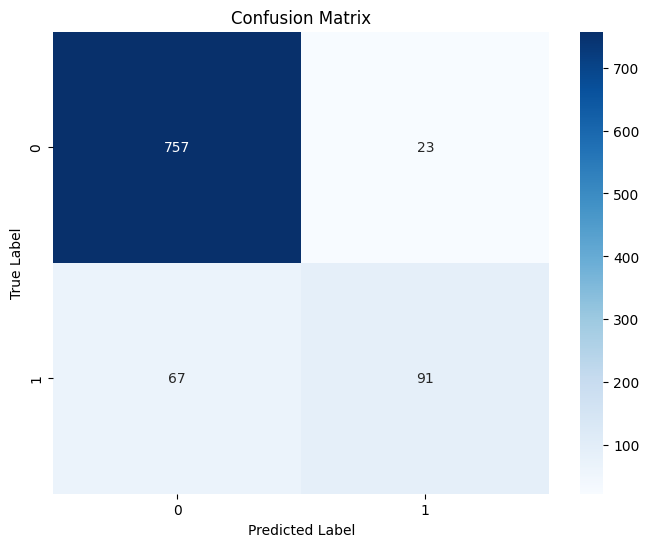

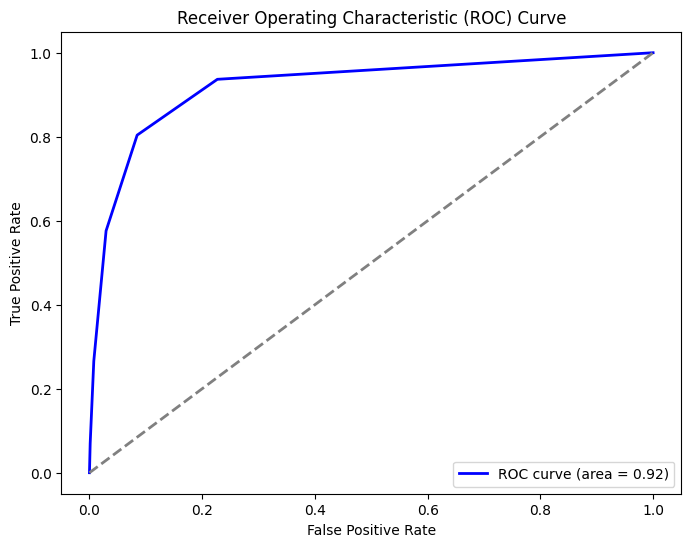

Accuracy: 90.41%
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       780
        True       0.80      0.58      0.67       158

    accuracy                           0.90       938
   macro avg       0.86      0.77      0.81       938
weighted avg       0.90      0.90      0.90       938



In [6]:
from numpy import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import numpy as np

X = data.drop('Hazardous', axis=1)
y = data['Hazardous']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate accuracy in percentage
accuracy_percentage = accuracy * 100
y_test_int = y_test.astype(int)
y_pred_int = pd.Series(y_pred).astype(int)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_int, y_pred_int)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
r2 = r2_score(y_test_int, y_pred_int)
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation results
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)

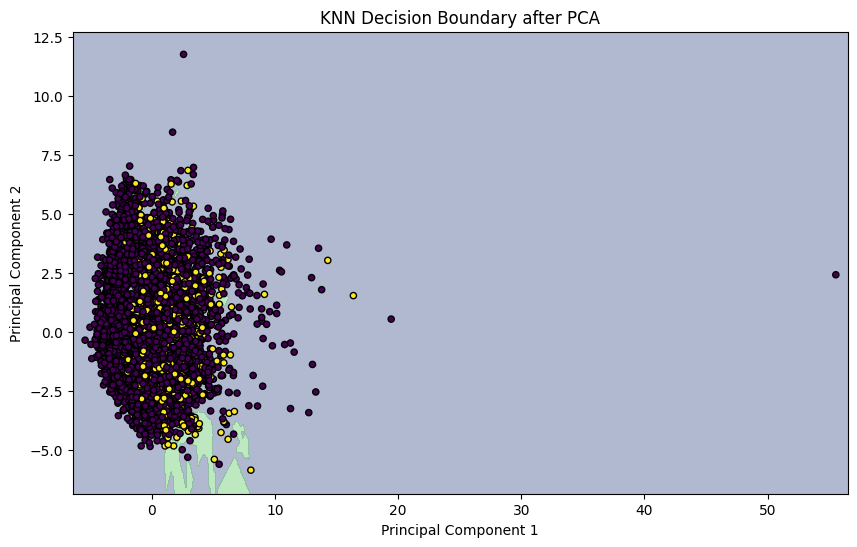

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced dataset into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model on the reduced dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predicting on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, edgecolor='k')
plt.title('KNN Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

R-squared (R2) Score: 0.9695553391755923
Mean Squared Error (MSE): 0.0042643923240938165
Root Mean Squared Error (RMSE): 0.06530231484483393
[[779   1]
 [  3 155]]


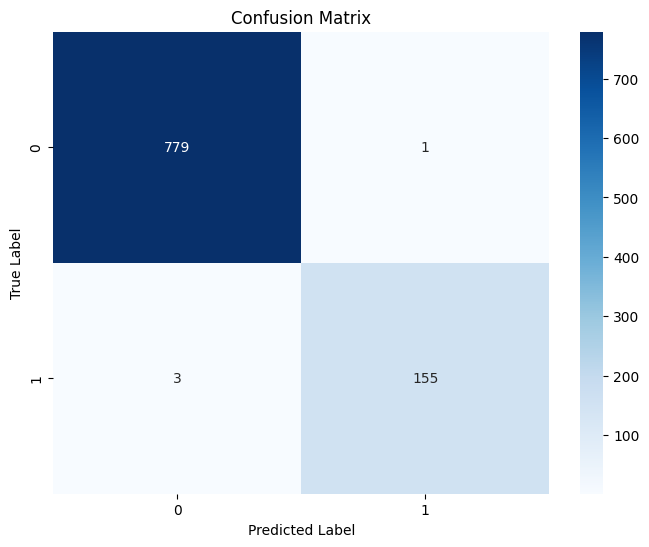

In [8]:
from numpy import sqrt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Hazardous', axis=1)
y = data['Hazardous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

y_test_int = y_test.astype(int)
y_pred_int = pd.Series(y_pred).astype(int)


mse = mean_squared_error(y_test_int, y_pred_int)


rmse = sqrt(mse)
r2 = r2_score(y_test_int, y_pred_int)
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculate accuracy in percentage
accuracy_percentage = accuracy * 100
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

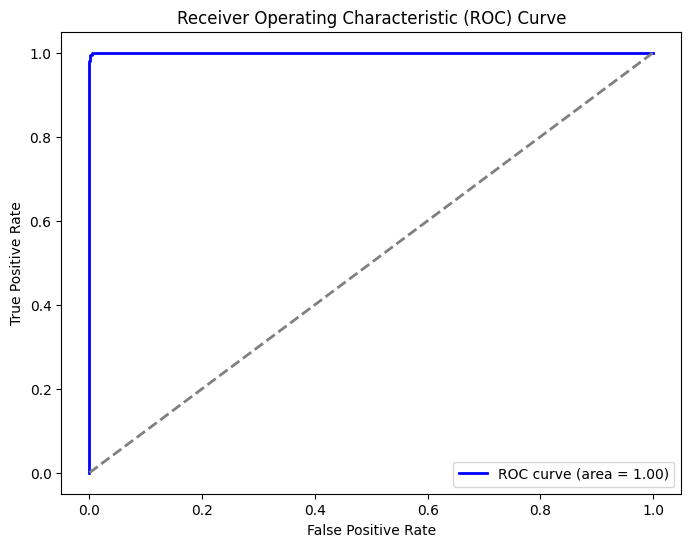

Accuracy: 99.57%
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       780
        True       0.99      0.98      0.99       158

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [9]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)


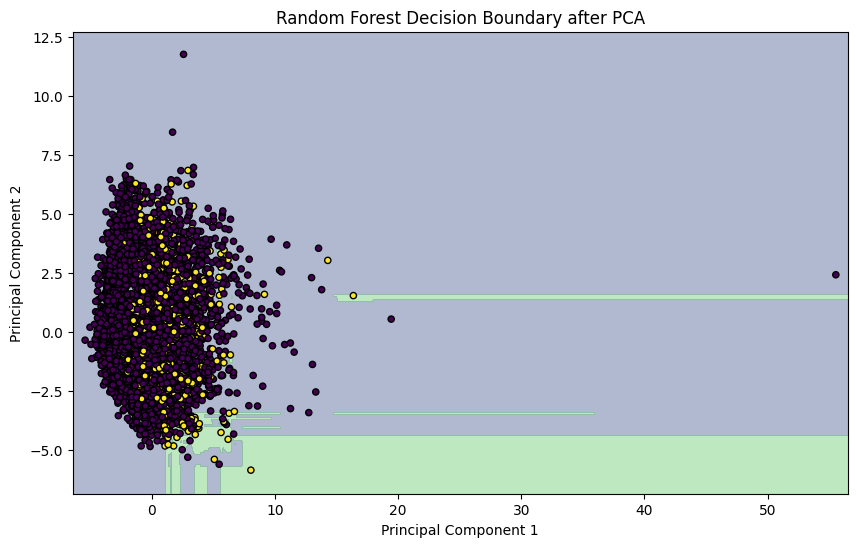

In [10]:
# Reducing the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

random_forest_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_reduced.fit(X_train_reduced, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = random_forest_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, edgecolor='k')
plt.title('Random Forest Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

R-squared (R2) Score: 0.6194417396949043
Mean Squared Error (MSE): 0.053304904051172705
Root Mean Squared Error (RMSE): 0.23087854826980506


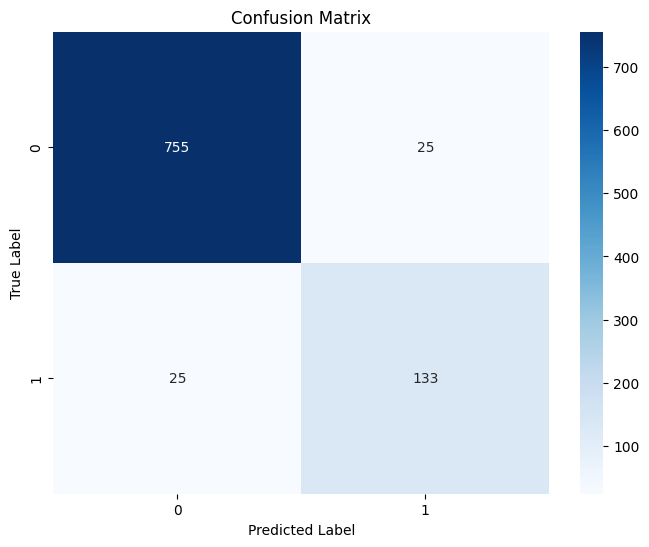

In [11]:
from numpy import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import numpy as np

X = data.drop('Hazardous', axis=1)
y = data['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

accuracy_percentage = accuracy * 100
y_test_int = y_test.astype(int)
y_pred_int = pd.Series(y_pred).astype(int)
mse = mean_squared_error(y_test_int, y_pred_int)


rmse = sqrt(mse)
r2 = r2_score(y_test_int, y_pred_int)
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

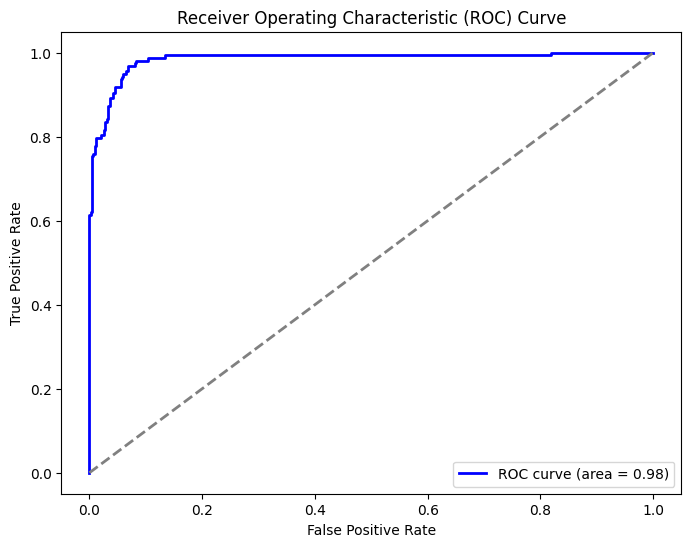

Accuracy: 94.67%
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       780
        True       0.84      0.84      0.84       158

    accuracy                           0.95       938
   macro avg       0.90      0.90      0.90       938
weighted avg       0.95      0.95      0.95       938



In [12]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation results
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)

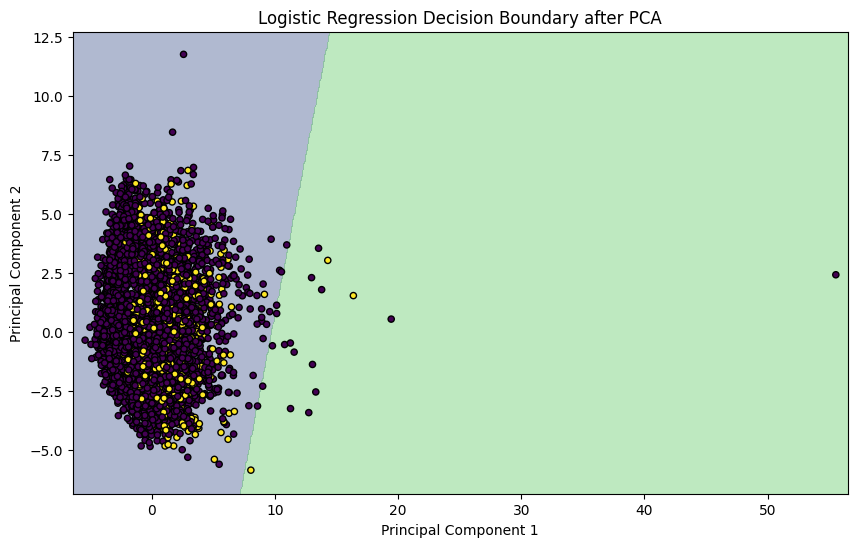

In [13]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()
log_reg.fit(X_train_reduced, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()